# MNIST and Iris Plant - Coding a k-NN Algorithm
We will work with two different datasets:
1.  MNIST 🔢
2.  Iris Plant Dataset 🪴

**Part 1:** Go through all of the code for a simple implementation of the sklearn KNN model using the MNIST dataset. 


**Part 2:** Reimplement this code but with the [Iris plants dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html).

- Exercise done as part of the Caregivers & Machine Learning Course from Vector Insitute. 







In [1]:
# import the necessary libraries and packages
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd



## Run the code with IRIS dataset
## Import and process your data to get ready to act as inputs to the KNN model




In [2]:
#Load in IRIS as dataset #2
dataset_2 = datasets.load_iris()
dataset_2_name = 'IRIS'

#look at the shape of your data, the number and name of classes
print('The shape of the {} dataset is {}'.format(dataset_2_name, dataset_2.data.shape))

#print('\nThis means we have {} {} x {} images'.format(dataset_1.images.shape[0], dataset_1.images.shape[1], dataset_1.images.shape[1]))

print('\nThere are {} classes in the {} dataset'.format(len(np.unique(dataset_2.target)), dataset_2_name))

print('\n The classes in the {} dataset are {}'.format(dataset_2_name, np.unique(dataset_2.target)))


The shape of the IRIS dataset is (150, 4)

There are 3 classes in the IRIS dataset

 The classes in the IRIS dataset are [0 1 2]


In [3]:
#######.    HINT    #############
# For Q5 you will have to comment this out because the data is tabular rather than image based

# Visualize a few  examples of what the data looks like
#plt.gray()
#plt.suptitle('Example {} images'.format(dataset_name))
#for i in range(1,11):
  #plt.subplot(2,5,i)
  #plt.imshow(dataset_1.images[i])

#### Split the data into train, test, and validation sets

In [4]:
# take the data and construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(dataset_2.data),
	dataset_2.target, test_size=0.25, random_state=42)

# now, let's take 10% of the training data and use that for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
	test_size=0.1, random_state=84)

# show the sizes of each data split
print("{} training data points: {}".format(dataset_2_name, len(trainLabels)))
print("{} validation data points: {}".format(dataset_2_name, len(valLabels)))
print("{} testing data points: {}".format(dataset_2_name, len(testLabels)))


IRIS training data points: 100
IRIS validation data points: 12
IRIS testing data points: 38


## Find the optimal performance for k on the validation set
K is a *hyperparamter* of the KNN model, meaning it needs to be tuned or chosen by the ML practitioner. We do this by evaluating the model on a preliminary validation set

In [5]:
#Create an array of all of the k-values we would like to evaluate 
k_values = range(1,100)

#Create an empty array that will store the accuracy values for each value of k
acc_list = []

for k in k_values:
  #Initialize the KNN model 
  knn = KNeighborsClassifier(n_neighbors=k)

  #Fit the model using the training data
  knn.fit(trainData, trainLabels)

  #Predict labels for the validation set
  pred = knn.predict(valData)

  #Evaluate model accuracy and save to a list for later analysis
  acc_list.append(metrics.accuracy_score(pred, valLabels))


The best accuracy was 0.9166666666666666
The K values where the accuracy is highest are (array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 17, 18, 19, 20]),)


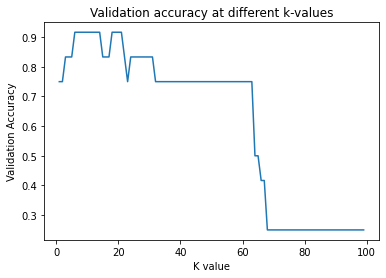

In [6]:
#Create a plot showing the relationship between the values of k and accuracy
plt.title('Validation accuracy at different k-values')
plt.xlabel('K value')
plt.ylabel('Validation Accuracy')

plt.plot(k_values, acc_list)

#Find the best value for K to be used for the test set 
print('The best accuracy was {}'.format(max(acc_list)))
idx = np.where(acc_list == np.max(acc_list))
print('The K values where the accuracy is highest are {}'.format(idx))


## Test the model with your selected hyperparameters 
After visual inspection I chose a k-value of 10. Although they are all equal having more points improves model robustness but I can see there is a steep decline in performance after 15.

In [7]:
#Retrain the model with the selected k_value
#Initialize the KNN model 
k=10
knn = KNeighborsClassifier(n_neighbors=k)

#Fit the model using the training data
knn.fit(trainData, trainLabels)

#Predict labels for the test set
pred_test = knn.predict(testData)
test_acc = metrics.accuracy_score(pred_test, testLabels)
print('Final test accuracy is {} for {}'.format(test_acc, dataset_2_name))

Final test accuracy is 1.0 for IRIS


## Running the code with IRIS as a data frame

In [8]:
# Loading iris dataset
dataset_2df = pd.DataFrame(dataset_2.data, columns = dataset_2.feature_names)
dataset_2df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [9]:
#look at the shape of your data, the number and name of classes
print('The shape of the {} dataset is {}'.format(dataset_2_name, dataset_2df.shape))

#print('\nThis means we have {} {} x {} images'.format(dataset_1.images.shape[0], dataset_1.images.shape[1], dataset_1.images.shape[1]))

print('\nThere are {} classes in the {} dataset'.format(len(np.unique(dataset_2.target)), dataset_2_name))

print('\n The classes in the {} dataset are {}'.format(dataset_2_name, np.unique(dataset_2.target)))

The shape of the IRIS dataset is (150, 4)

There are 3 classes in the IRIS dataset

 The classes in the IRIS dataset are [0 1 2]


In [10]:
# take the data and construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(dataset_2df),
	dataset_2.target, test_size=0.25, random_state=42)

# now, let's take 10% of the training data and use that for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
	test_size=0.1, random_state=84)

# show the sizes of each data split
print("{} training data points: {}".format(dataset_2_name, len(trainLabels)))
print("{} validation data points: {}".format(dataset_2_name, len(valLabels)))
print("{} testing data points: {}".format(dataset_2_name, len(testLabels)))

IRIS training data points: 100
IRIS validation data points: 12
IRIS testing data points: 38


In [11]:
#Create an array of all of the k-values we would like to evaluate 
k_values = range(1,100)

#Create an empty array that will store the accuracy values for each value of k
acc_list = []

for k in k_values:
  #Initialize the KNN model 
  knn = KNeighborsClassifier(n_neighbors=k)

  #Fit the model using the training data
  knn.fit(trainData, trainLabels)

  #Predict labels for the validation set
  pred = knn.predict(valData)

  #Evaluate model accuracy and save to a list for later analysis
  acc_list.append(metrics.accuracy_score(pred, valLabels))

The best accuracy was 0.9166666666666666
The K values where the accuracy is highest are (array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 17, 18, 19, 20]),)


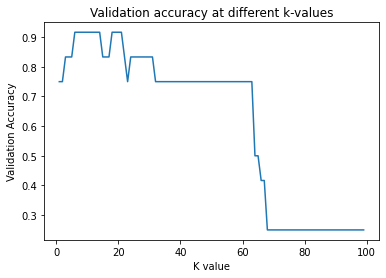

In [12]:
#Create a plot showing the relationship between the values of k and accuracy
plt.title('Validation accuracy at different k-values')
plt.xlabel('K value')
plt.ylabel('Validation Accuracy')

plt.plot(k_values, acc_list)

#Find the best value for K to be used for the test set 
print('The best accuracy was {}'.format(max(acc_list)))
idx = np.where(acc_list == np.max(acc_list))
print('The K values where the accuracy is highest are {}'.format(idx))

In [13]:
#Retrain the model with the selected k_value
#Initialize the KNN model 
k=10
knn = KNeighborsClassifier(n_neighbors=k)

#Fit the model using the training data
knn.fit(trainData, trainLabels)

#Predict labels for the test set
pred_test = knn.predict(testData)
test_acc = metrics.accuracy_score(pred_test, testLabels)
print('Final test accuracy is {} for {}'.format(test_acc, dataset_2_name))

Final test accuracy is 1.0 for IRIS


## Running the code with IRIS as a dataframe, but selecting just the first two features (sepal_len and sepal_wid)

In [15]:
dataset_2df_2=dataset_2df.iloc[:,[0,1]]
dataset_2df_2.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]>

In [16]:
#look at the shape of your data, the number and name of classes
print('The shape of the {} dataset is {}'.format(dataset_2_name, dataset_2df_2.shape))

#print('\nThis means we have {} {} x {} images'.format(dataset_1.images.shape[0], dataset_1.images.shape[1], dataset_1.images.shape[1]))

print('\nThere are {} classes in the {} dataset'.format(len(np.unique(dataset_2.target)), dataset_2_name))

print('\n The classes in the {} dataset are {}'.format(dataset_2_name, np.unique(dataset_2.target)))

The shape of the IRIS dataset is (150, 2)

There are 3 classes in the IRIS dataset

 The classes in the IRIS dataset are [0 1 2]


In [17]:
# take the data and construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(dataset_2df_2),
	dataset_2.target, test_size=0.25, random_state=42)

# now, let's take 10% of the training data and use that for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
	test_size=0.1, random_state=84)

# show the sizes of each data split
print("{} training data points: {}".format(dataset_2_name, len(trainLabels)))
print("{} validation data points: {}".format(dataset_2_name, len(valLabels)))
print("{} testing data points: {}".format(dataset_2_name, len(testLabels)))

IRIS training data points: 100
IRIS validation data points: 12
IRIS testing data points: 38


In [18]:
#Create an array of all of the k-values we would like to evaluate 
k_values = range(1,100)

#Create an empty array that will store the accuracy values for each value of k
acc_list = []

for k in k_values:
  #Initialize the KNN model 
  knn = KNeighborsClassifier(n_neighbors=k)

  #Fit the model using the training data
  knn.fit(trainData, trainLabels)

  #Predict labels for the validation set
  pred = knn.predict(valData)

  #Evaluate model accuracy and save to a list for later analysis
  acc_list.append(metrics.accuracy_score(pred, valLabels))

The best accuracy was 0.75
The K values where the accuracy is highest are (array([15, 16, 17, 53, 55, 56, 57]),)


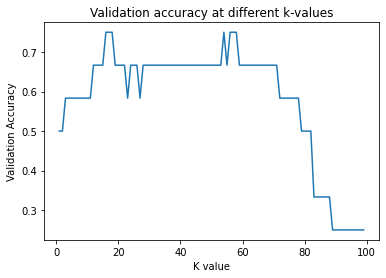

In [19]:
#Create a plot showing the relationship between the values of k and accuracy
plt.title('Validation accuracy at different k-values')
plt.xlabel('K value')
plt.ylabel('Validation Accuracy')

plt.plot(k_values, acc_list)

#Find the best value for K to be used for the test set 
print('The best accuracy was {}'.format(max(acc_list)))
idx = np.where(acc_list == np.max(acc_list))
print('The K values where the accuracy is highest are {}'.format(idx))

In [20]:
#Retrain the model with the selected k_value
#Initialize the KNN model 
k=10
knn = KNeighborsClassifier(n_neighbors=k)

#Fit the model using the training data
knn.fit(trainData, trainLabels)

#Predict labels for the test set
pred_test = knn.predict(testData)
test_acc = metrics.accuracy_score(pred_test, testLabels)
print('Final test accuracy is {} for {}'.format(test_acc, dataset_2_name))

Final test accuracy is 0.8157894736842105 for IRIS
